<a href="https://colab.research.google.com/github/CeliaDiazSanchez/Data-Mining/blob/LAB02/LAB02_p2_ana_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **LABORATORIO 2**
**Grupo**: B01

**Integrantes**: Claudia Esnarrizaga, Ana Robledano, Celia Díaz, Julia Callaba

## **PRÁCTICA 1 (Reglas de Asociación)**

###**Enunciado**

Usa la librería `mlxtend` que nos permita solucionar todos los problemas relacionados con las reglas de
asociación. Para ello tendremos que usar el algoritmo Apriori y una serie de métodos para obtener la distinta
información que este genera.

Usaremos la librería con el Dataset **Market_Basket_Optimisation.csv** que se ha proporcionado.

Prueba al menos tres configuraciones de soporte y frecuencia para cada tipo de puntuación.

¿Qué diferencias hay entre usar soporte y frecuencia? Respalda la respuesta con datos

¿Qué tipo de reglas desaparecen según la configuración usada y el tipo de puntuación? ¿Por qué?

Para una de las configuraciones, interpreta algunas de las reglas que te hayan resultado curiosas obtenidas
usando la clase `association_rules` y un par de configuraciones cambiando la variable `metric` y `min_threshold`.

Dadas las mejores configuraciones. ¿Existen reglas o patrones que se repitan? ¿Podemos generalizar de alguna
manera como se comportan los clientes del supermercado?

## **PRÁCTICA 2 (Patronces Secuenciales)**




Importamos las librerías necesarias y el archivo.

In [190]:
import requests
import pandas as pd

# URL del archivo CSV en GitHub
url = "https://raw.githubusercontent.com/CeliaDiazSanchez/Data-Mining/LAB02/Online Retail.xlsx"

nombre = 'Online Retail.xlsx'


# Realizar la solicitud GET para obtener el contenido del archivo
response = requests.get(url)

# Verificar si la solicitud fue exitosa (código de estado 200)
if response.status_code == 200:
     # Guardar el contenido del archivo en un archivo local
    with open(nombre, 'wb') as f:
        f.write(response.content)
    print("Archivo descargado exitosamente.")
else:
    print("Error al descargar el archivo.")

Archivo descargado exitosamente.


Cargamos el archivo de 'Online Retail.xlsx' en un DataFrame de pandas que llamamos `df`.

In [191]:
df = pd.read_excel('Online Retail.xlsx')

df.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom


Creamos una copia de `df` para modificarla sin afectar al original

In [192]:
ds = df.copy()
id(df), id(ds)


(137620950279568, 137620950284752)

# Exploración de la base de datos

Tenemos un DataFrame con 541909 registros y 8 atributos.

In [193]:
df.shape

(541909, 8)

In [194]:
df.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom


`df` contiene una base de datos de compras online de varios clientes a lo largo del tiempo. Para cada producto comprado por un cliente en una fecha se lleva un registro de las siguientes variables:

In [195]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

Con los siguientes tipos:

In [196]:
df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID              int64
Country                object
dtype: object

- InvoiceNo: Este es el número de factura que identifica de forma única cada transacción de compra. Cada vez que se realiza una compra, se genera una nueva factura con un número de factura único.

- StockCode: Este es un código único que identifica un producto específico en el inventario de la tienda en línea. Cada producto en el inventario tiene su propio código de stock.

- Description: Esta columna proporciona una descripción del producto asociado con el código de stock. Proporciona información adicional sobre el producto, como su nombre o características.

- Quantity: Esta columna indica la cantidad de unidades del producto que se compraron en la transacción correspondiente. Por ejemplo, si se compra un producto en múltiples cantidades, el valor en esta columna será mayor que 1.

- InvoiceDate: Este es el timestamp que indica la fecha y hora en que se realizó la transacción de compra. Proporciona información sobre cuándo se llevó a cabo la compra.

- UnitPrice: Este es el precio unitario del producto en la moneda local en la que se realizó la transacción. Indica cuánto cuesta una sola unidad del producto.

- CustomerID: Este es el identificador único del cliente que realizó la compra. Cada cliente tiene un CustomerID único asociado con su cuenta en la tienda en línea.

- Country: Esta columna indica el país donde se realizó la transacción. Proporciona información sobre la ubicación geográfica del cliente que realizó la compra.

Los países que compran de la tienda son los siguientes:

In [197]:
import numpy as np
np.sort(df['Country'].unique())

array(['Australia', 'Austria', 'Bahrain', 'Belgium', 'Brazil', 'Canada',
       'Channel Islands', 'Cyprus', 'Czech Republic', 'Denmark', 'EIRE',
       'European Community', 'Finland', 'France', 'Germany', 'Greece',
       'Hong Kong', 'Iceland', 'Israel', 'Italy', 'Japan', 'Lebanon',
       'Lithuania', 'Malta', 'Netherlands', 'Norway', 'Poland',
       'Portugal', 'RSA', 'Saudi Arabia', 'Singapore', 'Spain', 'Sweden',
       'Switzerland', 'USA', 'United Arab Emirates', 'United Kingdom',
       'Unspecified'], dtype=object)

No parece que haya ningún error de transcripción, aunque sí que hay una categoría llamada `Unspecified`. Como en este estudio de patrones secuenciales no tendremos en cuenta el país, no hará falta hacer ninguna modificación.

Vamos a pasar los `StockCodes` y `Descripciones` a mayúsculas para evitar errores de este tipo.

In [179]:
# df['StockCode'] = df['StockCode'].str.upper()
# df['Description'] = df['Description'].str.upper()

### Algunas cifras del dataset:

---



Hay transacciones de `4372` clientes distintos determinados por su ID.

In [198]:
df['CustomerID'].unique().size

4372

`4070` productos distintos determinados por su código de producto. No obstante, más adelante analizaremos los códigos para eliminar posibles errores de transcripción o datos irrelevantes.

In [199]:
df['StockCode'].unique().size

4070

`25900` facturas de compra distintas.

In [200]:
df['InvoiceNo'].unique().size

25900

`23260` días en los que hubo transacciones.

In [201]:
df['InvoiceDate'].unique().size

23260

Una factura está compuesta de varios productos por lo que esta se repite en tantos registros como productos contenga.

In [202]:
df['InvoiceNo'].value_counts()

573585     1114
581219      749
581492      731
580729      721
558475      705
           ... 
554023        1
554022        1
554021        1
554020        1
C558901       1
Name: InvoiceNo, Length: 25900, dtype: int64

Los `StockCodes` también se repiten como es de esperar. Productos del mismo tipo pueden ser comprados por personas distintas y/o en días distintos.

In [203]:
df['StockCode'].value_counts()

85123A    2313
22423     2203
85099B    2159
47566     1727
20725     1639
          ... 
21431        1
22275        1
17001        1
90187A       1
72759        1
Name: StockCode, Length: 4070, dtype: int64

Sin embargo para un mismo producto asociado a un `StockCode` puede tomar precios por unidad distintos.

In [204]:
df.groupby('StockCode')['UnitPrice'].unique()

StockCode
10002                                   [0.85, 1.66, 1.63, 0.0]
10080                                         [0.85, 0.39, 0.0]
10120                                                    [0.21]
10125                      [0.85, 1.66, 0.42, 0.81, 0.79, 1.63]
10133           [0.85, 1.66, 0.42, 0.81, 0.79, 1.63, 0.83, 0.0]
                                     ...                       
gift_0001_20                                [17.02, 16.67, 0.0]
gift_0001_30                                 [25.53, 25.0, 0.0]
gift_0001_40                                     [34.04, 33.33]
gift_0001_50                                     [42.55, 41.67]
m                                                        [2.55]
Name: UnitPrice, Length: 4070, dtype: object

Y también descripciones distintas, aunque algunas de ellas parecen errores ('nan', 'check')

In [205]:
df.groupby('StockCode')['Description'].unique()

StockCode
10002                          [INFLATABLE POLITICAL GLOBE , nan]
10080                      [GROOVY CACTUS INFLATABLE, nan, check]
10120                                              [DOGGY RUBBER]
10125                                   [MINI FUNKY DESIGN TAPES]
10133                     [COLOURING PENCILS BROWN TUBE, damaged]
                                      ...                        
gift_0001_20    [Dotcomgiftshop Gift Voucher £20.00, to push o...
gift_0001_30            [Dotcomgiftshop Gift Voucher £30.00, nan]
gift_0001_40                 [Dotcomgiftshop Gift Voucher £40.00]
gift_0001_50                 [Dotcomgiftshop Gift Voucher £50.00]
m                                                        [Manual]
Name: Description, Length: 4070, dtype: object

**Nota:** *como aún no se ha limpiado la base de datos, estas cantidades son orientativas. Podría haber errores de transcripción o datos inconsistentes que alteran los resultados. Este análisis a priori es solo para hacernos una idea aproximada de las proporciones de cantidades de clientes, productos, facturas, ... posterior a la limpieza podríamos repetir el proceso para mayor precisión.*

## Ejemplo

---



Vamos a tomar la primera factura de ejemplo, para analizar su contenido.

In [206]:
factura_test = df[df['InvoiceNo'] == 573585]
factura_test.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
430237,573585,11001,ASSTD DESIGN RACING CAR PEN,2,2011-10-31 14:41:00,3.29,15287,United Kingdom
430238,573585,15036,ASSORTED COLOURS SILK FAN,15,2011-10-31 14:41:00,1.63,15287,United Kingdom
430239,573585,15039,SANDALWOOD FAN,15,2011-10-31 14:41:00,1.63,15287,United Kingdom
430240,573585,15056BL,EDWARDIAN PARASOL BLACK,1,2011-10-31 14:41:00,12.46,15287,United Kingdom
430241,573585,15056N,EDWARDIAN PARASOL NATURAL,1,2011-10-31 14:41:00,12.46,15287,United Kingdom


In [207]:
factura_test['CustomerID'].unique().size

1

In [208]:
factura_test['InvoiceDate'].unique().size

1

De esta factura podemos sacar 3 observaciones:
- El número de factura no es compartido por más de un cliente.
- El número de factura no es compartido por más de una fecha.
- La factura contiene varios productos determinados por su `StockCode`.
Es decir, para cada compra de cada cliente en una fecha determinada, se crea una factura con ID único y que contiene ID's de productos.

En este caso hay 4 `StockCodes` repetidos, ya que la factura se repite en el dataset 1114 veces y solo hay 1110 `StockCodes` únicos para ese número de factura.

In [209]:
factura_test['StockCode'].unique().size

1110

4 no es una cantidad significativa, podría tratarse de errores en los datos del ejemplo elegido, veamos en otra factura si se da el mismo escenario:

In [210]:
factura_test2 = df[df['InvoiceNo'] == 581219]
# La factura aparece en 749 entradas
print(factura_test2.shape)
# Hay 749 StockCodes distintos asociados al nº de factura, uno para cada entrada
print(factura_test2['StockCode'].unique().size)

(749, 8)
749


En esta ocasión, no se repite ningún `StockCode` en la misma factura.

# Estudio de NaNs

Aparecen NaN's en el atributo `Description`, veremos qué porcentaje suponen y qué medidas tomar en base a ello.

In [211]:
df.isna().sum()

InvoiceNo         0
StockCode         0
Description    1454
Quantity          0
InvoiceDate       0
UnitPrice         0
CustomerID        0
Country           0
dtype: int64

In [212]:
conteo_nans = df['Description'].isna().sum()
conteo_no_nans = len(df) - conteo_nans

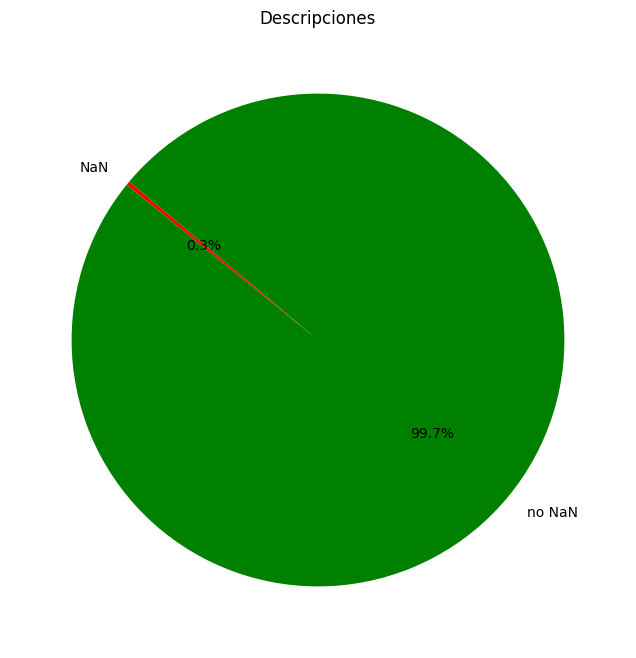

In [213]:
import matplotlib.pyplot as plt

sizes = [conteo_nans, conteo_no_nans]
labels = ['NaN','no NaN']

# Crear un gráfico circular
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%',colors=['red','green'], startangle=140)

# Añadir título
plt.title('Descripciones')

# Mostrar el gráfico
plt.show()


Las entradas con descripciones NaN suponen un porcentaje muy bajo de las totales, podríamos eliminar dichas entradas pero antes limpiaremos la base de datos ya que podrían ser eliminados igualmente si pertenecen a registros con otros datos inconsistentes.

## Limpieza de la base de datos

### Cantidades

Entendemos que la cantidad de un producto es positiva cuando el cliente se lleva de la tienda artículos y negativa cuando los devuelve. Para confirmar esta hipótesis procedemos a analizar los datos con cantidades negativas.

In [214]:
negative = df[df['Quantity'] < 0]
negative.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom


Observamos que para el `StockCode` 'D', se trata de un descuento, que queda registrado como cantidad negativa.

In [215]:
discounts = df[df['StockCode'] == 'D']
discounts.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527,United Kingdom
9038,C537164,D,Discount,-1,2010-12-05 13:21:00,29.29,14527,United Kingdom
14498,C537597,D,Discount,-1,2010-12-07 12:34:00,281.00,15498,United Kingdom


In [216]:
print(discounts.shape[0])

77


Queda registrado que hubo `77` descuentos en total, y tomaban las siguientes cantidades negativas en la columna de `Quantity`

In [217]:
print(discounts['Quantity'].unique())

[  -1 -720 -240  -18  -48  -96]


Algunos descuentos toman cifras muy elevadas, esto podría provocar pérdidas a la tienda pero comprobamos que se trata de descuentos con `UnitPrice` muy bajos.

In [218]:
discounts.groupby('Quantity')['UnitPrice'].unique()

Quantity
-720                                               [0.01]
-240                                               [0.03]
-96                                                 [0.7]
-48                                                 [0.2]
-18                                                [1.45]
-1      [27.5, 29.29, 281.0, 267.12, 5.76, 42.5, 26.93...
Name: UnitPrice, dtype: object

Para analizar los demás registros con cantidades negativas, tomamos un ejemplo de un cliente que tiene una cantidad negativa en una de sus compras.

In [219]:
test = df[df['CustomerID'] == 15311]

Queremos ver qué productos están en la transacción de la factura que contiene la cantidad negativa.

In [220]:
test[test['InvoiceNo'] == 'C536383']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311,United Kingdom


No compró otros productos en esa transacción.

Veamos si ese cliente compró el set de 3 patos coloreados voladores en otras ocasiones, y si aparecen con cantidades negativas.

In [221]:
test = df[df['CustomerID'] == 15311]
test[test['StockCode'] == '35004C']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311,United Kingdom
9200,537195,35004C,SET OF 3 COLOURED FLYING DUCKS,12,2010-12-05 13:55:00,4.65,15311,United Kingdom
18196,C537805,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-08 13:18:00,4.65,15311,United Kingdom
28630,538651,35004C,SET OF 3 COLOURED FLYING DUCKS,12,2010-12-13 15:07:00,4.65,15311,United Kingdom
39381,C539640,35004C,SET OF 3 COLOURED FLYING DUCKS,-3,2010-12-20 15:27:00,4.65,15311,United Kingdom
44157,540157,35004C,SET OF 3 COLOURED FLYING DUCKS,12,2011-01-05 11:41:00,4.65,15311,United Kingdom
59542,541293,35004C,SET OF 3 COLOURED FLYING DUCKS,12,2011-01-17 13:39:00,4.65,15311,United Kingdom
78333,C542866,35004C,SET OF 3 COLOURED FLYING DUCKS,-2,2011-02-01 12:14:00,4.65,15311,United Kingdom


En efecto, realizó varias compras del set, en ocasiones la compra aparece con cantridad del producto negativa, por lo que interpretamos que se trata de devoluciones del producto.

In [222]:
negative.shape[0] - discounts.shape[0]

10547

Parece que las cantidades negativas de productos se refieren a devoluciones o descuentos. Es interesante que de los `541909` eventos de productos comprados, `10421` son devueltos. Podría deberse a varios factores como que el producto estaba defectuoso, talla incorrecta, ... De cualquier manera, se trata de un problema distinto al de patrones secuenciales por lo que vamos a eliminar las entradas con valores negativos.

In [223]:
df = df.drop(df[df['Quantity'] < 0].index)
if df[df['Quantity'] < 0].shape[0] == 0:
  print('Los registros con cantidades de producto negativas fueron eliminados')

Los registros con cantidades de producto negativas fueron eliminados


Por otra parte no hay ninguna cantidad 0 de producto(s) comprados.

In [224]:
df[df['Quantity'] == 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


### Precios

Hacemos el mismo proceso con los precios menores o iguales a 0.

In [225]:
df[df['UnitPrice'] < 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
299983,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,15287,United Kingdom
299984,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,15287,United Kingdom


Según la descripción se trata de un error de cobro que fue arreglado.

In [226]:
df = df.drop(df[df['UnitPrice'] < 0].index)

A continuación veremos los precios que son 0.

In [227]:
cero_price = df[df['UnitPrice'] == 0]
cero_price.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.0,15287,United Kingdom
1970,536545,21134,NaN,1,2010-12-01 14:32:00,0.0,15287,United Kingdom
1971,536546,22145,NaN,1,2010-12-01 14:33:00,0.0,15287,United Kingdom
1972,536547,37509,NaN,1,2010-12-01 14:33:00,0.0,15287,United Kingdom
1987,536549,85226A,NaN,1,2010-12-01 14:34:00,0.0,15287,United Kingdom
1988,536550,85044,NaN,1,2010-12-01 14:34:00,0.0,15287,United Kingdom
2024,536552,20950,NaN,1,2010-12-01 14:34:00,0.0,15287,United Kingdom
2025,536553,37461,NaN,3,2010-12-01 14:35:00,0.0,15287,United Kingdom
2026,536554,84670,NaN,23,2010-12-01 14:35:00,0.0,15287,United Kingdom
4348,536765,84952C,NaN,19,2010-12-02 14:43:00,0.0,15287,United Kingdom


A primera vista, aparecen bastantes NaN's. Veamos cuántos hay exactamente para este caso.

In [228]:
cero_price.size

9432

Las descripciones de los eventos con precios igual a cero, son inconsistentes. Podría tratarse de personas que no completaron el proceso de compra, cancelaron el envío u obtuvieron algún artículo gratis como parte de una promoción.

De `9400` registros con precios igual a cero, hay `588` de ellos con NaN en la descripción.

In [229]:
cero_price.isna().sum()

InvoiceNo        0
StockCode        0
Description    592
Quantity         0
InvoiceDate      0
UnitPrice        0
CustomerID       0
Country          0
dtype: int64

`32` clientes que realizaron transacciones con productos con precios igual a cero. Recordamos que anteriormente calculamos que hay `4339` clientes en total, los clientes con transacciones de productos de precio cero, suponen apenas un 0.74% del total y podría tratarse de familiares/amigos de la tienda que obtuvieron productos gratis.

In [230]:
cero_customers = cero_price['CustomerID'].unique().size
print(cero_customers)
normal_customers = df['CustomerID'].unique().size - cero_customers

32


Hacemos el mismo estudio con el número total de registros y el número de registros que contienen precios igual a cero.

In [231]:
cero_registers = cero_price.shape[0]
normal_registers = df.shape[0] - cero_registers

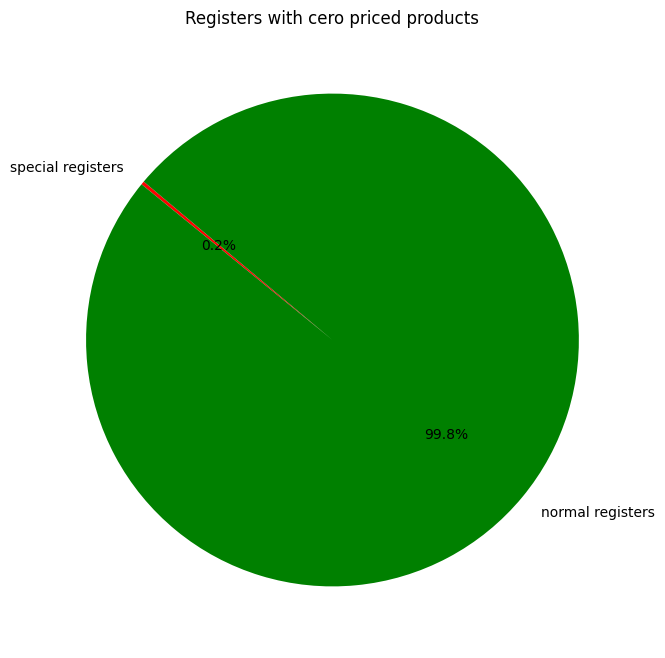

In [232]:
import matplotlib.pyplot as plt

sizes = [cero_registers, normal_registers]
labels = ['special registers','normal registers']

# Crear un gráfico circular
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%',colors=['red','green'], startangle=140)

# Añadir título
plt.title('Registers with cero priced products')

# Mostrar el gráfico
plt.show()

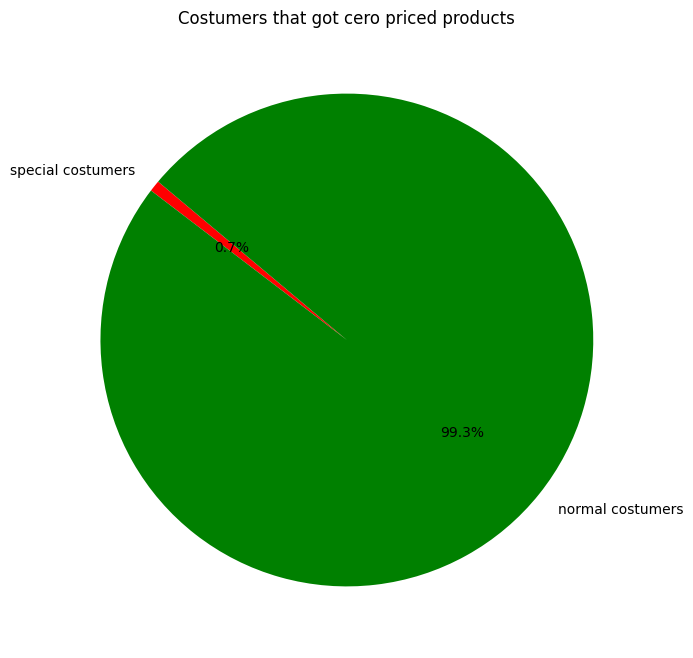

In [233]:

import matplotlib.pyplot as plt

sizes = [cero_customers, normal_customers]
labels = ['special costumers','normal costumers']

# Crear un gráfico circular
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%',colors=['red','green'], startangle=140)

# Añadir título
plt.title('Costumers that got cero priced products')

# Mostrar el gráfico
plt.show()

Del total número de clientes solo el `0.7%` realizó transacciones de productos con precios igual a cero y del número total de registros solo el `0.2%` tienen productos con precio cero. Los productos comprados por precio cero no es un tipo de transacción que los clientes comunes realicen ni que se repite mucho, concluimos con que es irrelevante para estudiar los patrones de compra de clientes y lo eliminamos.

In [234]:
df = df.drop(df[df['UnitPrice'] == 0].index)

## StockCodes

Al ser una tienda online, se espera que en las transacciones haya una parte dedicada al envío de los productos adquiridos.

Encontramos que el StockCode `'POS'` hace referencia según la descripción, al servicio de envío postal. Este servicio no lo consideramos como producto de la tienda ya que no aporta ninguna información sobre las preferencias de los clientes.

In [235]:
df[df['StockCode'] == 'POST']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
45,536370,POST,POSTAGE,3,2010-12-01 08:45:00,18.0,12583,France
386,536403,POST,POSTAGE,1,2010-12-01 11:27:00,15.0,12791,Netherlands
1123,536527,POST,POSTAGE,1,2010-12-01 13:04:00,18.0,12662,Germany
5073,536840,POST,POSTAGE,1,2010-12-02 18:27:00,18.0,12738,Germany
5258,536852,POST,POSTAGE,1,2010-12-03 09:51:00,18.0,12686,France
...,...,...,...,...,...,...,...,...
541198,581493,POST,POSTAGE,1,2011-12-09 10:10:00,15.0,12423,Belgium
541216,581494,POST,POSTAGE,2,2011-12-09 10:13:00,18.0,12518,Germany
541730,581570,POST,POSTAGE,1,2011-12-09 11:59:00,18.0,12662,Germany
541767,581574,POST,POSTAGE,2,2011-12-09 12:09:00,18.0,12526,Germany


In [236]:
df = df.drop(df[df['StockCode'] == 'POST'].index)
if df[df['StockCode'] == 'POST'].shape[0] == 0:
  print('Se ha eliminado correctamente')

Se ha eliminado correctamente


Nos damos cuenta de que por lo general, el atributo `StockCode` es un código con números y a veces letras. No obstante, hay algunos registros con `StockCode` que no tienen forma de código, vamos a analizar esos casos.

Veamos los `StockCode` que tienen longitud 1.

In [237]:
# Convertir los valores de la columna 'StockCode' a cadenas de texto
codigos = df['StockCode'].unique()
codigos = codigos.astype(str)
v = []
for registro in codigos:
  if len(registro) < 2:
    v.append(registro)
# Convertir el vector en un conjunto para eliminar los duplicados
conjunto = set(v)

# Convertir el conjunto de nuevo en una lista
v= list(conjunto)
print(v)

['M', 'm', 'S', 'B']


Para analizarlos en base a sus descripciones:

In [238]:
# DataFrame vacío para almacenar los resultados
df_concatenado = pd.DataFrame()
for element in v:
  df_concatenado = pd.concat([df[df['StockCode'] == element], df_concatenado])
# Agrupamos por descripcion
df_concatenado.groupby('StockCode')['Description'].unique()

StockCode
B    [Adjust bad debt]
M             [Manual]
S            [SAMPLES]
m             [Manual]
Name: Description, dtype: object

In [239]:
df_concatenado[df_concatenado['StockCode'] == 'S'].head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
152709,549684,S,SAMPLES,1,2011-04-11 13:24:00,30.00,15287,United Kingdom
419666,572849,S,SAMPLES,1,2011-10-26 12:20:00,33.05,15287,United Kingdom


In [240]:
df_concatenado[df_concatenado['StockCode'] == 'M'].head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
2239,536569,M,Manual,1,2010-12-01 15:35:00,1.25,16274,United Kingdom
2250,536569,M,Manual,1,2010-12-01 15:35:00,18.95,16274,United Kingdom
5684,536865,M,Manual,1,2010-12-03 11:28:00,2.55,15287,United Kingdom


El `StockCode` con valor 'B' es un ajuste por lo que lo eliminamos, los demás son productos lícitos que tienen precios y cantidades normales.

In [241]:
df = df.drop(df[df['StockCode'] == 'B'].index)



---



Veamos tras la limpieza cómo han cambiado los NaN.
- Con el dataset original:

In [242]:
ds.isna().sum()

InvoiceNo         0
StockCode         0
Description    1454
Quantity          0
InvoiceDate       0
UnitPrice         0
CustomerID        0
Country           0
dtype: int64

- Con el dataset limpiado:

In [243]:
df.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

Tras la limpieza de la base de datos, no aparece ningún valor NaN.

# Preparación para el algoritmo GSP

Eliminamos columnas innecesarias para el estudio de patrones secuenciales.

In [ ]:
print(df.dtypes)

InvoiceNo              object
StockCode              object
Description            object
InvoiceDate    datetime64[ns]
CustomerID              int64
Country                object
Total                 float64
dtype: object


In [ ]:
pip install gsppy

In [ ]:
from gsppy.gsp import GSP

# Crear una lista de transacciones para cada cliente
transacciones = df.groupby('CustomerID')['StockCode'].apply(list).tolist()

transacciones

[[23166, 23166],
 [85116,
  22375,
  71477,
  22492,
  22771,
  22772,
  22773,
  22774,
  22775,
  22805,
  22725,
  22726,
  22727,
  22728,
  22729,
  22212,
  '85167B',
  21171,
  22195,
  84969,
  '84997C',
  '84997B',
  '84997D',
  22494,
  22497,
  '85232D',
  21064,
  21731,
  '84558A',
  20780,
  20782,
  '84625A',
  '84625C',
  85116,
  20719,
  22375,
  22376,
  20966,
  22725,
  22726,
  22727,
  22728,
  22729,
  22196,
  84992,
  84991,
  21976,
  22417,
  '47559B',
  21154,
  21041,
  21035,
  22423,
  84969,
  22134,
  21832,
  22422,
  22497,
  21731,
  '84558A',
  22376,
  22374,
  22371,
  22375,
  20665,
  23076,
  21791,
  22550,
  23177,
  22432,
  22774,
  22195,
  22196,
  21975,
  21041,
  22423,
  22699,
  21731,
  22492,
  '84559A',
  '84559B',
  16008,
  22821,
  22497,
  23084,
  23162,
  23171,
  23172,
  23170,
  23173,
  23174,
  23175,
  22371,
  22375,
  85178,
  17021,
  23146,
  22196,
  '84558A',
  '51014C',
  22727,
  22725,
  23308,
  23297,
  223

In [ ]:
# Definir el StockCode que deseas buscar
stockcode_a_buscar = '84406B'  # Puedes cambiar esto al StockCode que necesites

# Buscar el StockCode en el DataFrame
resultado = df[df['StockCode'] == stockcode_a_buscar]

# Mostrar el nombre del cliente asociado al StockCode encontrado
if not resultado.empty:
    nombre_cliente = resultado.iloc[0]['CustomerID']
    print(f"El nombre del cliente asociado al StockCode {stockcode_a_buscar} es: {nombre_cliente}")
else:
    print(f"No se encontró ningún cliente asociado al StockCode {stockcode_a_buscar}")

El nombre del cliente asociado al StockCode 84406B es: 17850


In [ ]:
# Convertir la columna InvoiceDate a tipo datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Ordenar las transacciones por InvoiceDate
df = df.sort_values(by='InvoiceDate')

# Agrupar las transacciones por cliente y crear una lista de secuencias de transacciones para cada cliente
secuencias_clientes = df.groupby('CustomerID')['StockCode'].apply(list).tolist()

# Mostrar las primeras secuencias de transacciones para algunos clientes como ejemplo
for i in range(10):  # Mostrar las primeras 5 secuencias como ejemplo
    print(f"Cliente {i+1}: {secuencias_clientes[i]}")

Cliente 1: [23166, 23166]
Cliente 2: [22212, '84997C', '85167B', 21171, 22195, 84969, '84997B', '84558A', 22494, 22497, '85232D', 21064, 21731, 20780, 20782, 22729, '84997D', 22728, 22774, 22726, 22727, 85116, 22375, 22492, 22771, 22772, 22773, 22775, 22805, 22725, 71477, 22423, '47559B', 21154, 21041, 21035, 84969, 22417, 21832, 22422, 22497, 21731, '84558A', 22134, 21976, 22727, 84992, '84625A', '84625C', 85116, 20719, 22375, 22376, 84991, 22725, 22726, 20966, 22728, 22729, 22196, 21975, 22497, 22821, 16008, '84559B', '84559A', 22492, 21731, 22699, 22423, 21041, 22196, 22376, 22774, 22374, 22371, 22375, 20665, 22195, 21791, 22550, 23177, 22432, 23076, 85178, 22725, 22727, '51014C', '84558A', 22196, 23146, 17021, 22375, 22371, 23175, 23174, 23173, 23170, 23172, 23171, 23162, 23084, 23316, 21791, 22992, 23147, 23175, 22423, 21975, 84991, 84992, '47559B', '84558A', 23146, 20719, 21578, 22372, 22376, 22374, 22375, 23297, 23308, 22727, 22371, 22725, 22699, 23420, 23422, 22492, 23146, 2262


Los valores negativos probablemente significan que hubo devoluciones. Este es un factor importante para el comercio electrónico, pero para este estudio vamos a mantener solo las transacciones sin devolución (nuestro objetivo es presentar y comparar diferentes métodos de agrupación).

In [ ]:
df = df.loc[df["Quantity"] >0 ]
df = df.loc[df["UnitPrice"] >0 ]

Creamos una nueva columna que se llame Cantidad total

In [ ]:
# creating a new column of Total amount
df["Total"]=df["Quantity"]*df["UnitPrice"]

Eliminamos las columnas 'Quantity' y 'UnitPrice' y revisar los datos en busca de valores faltantes

In [ ]:
df.drop(['Quantity', 'UnitPrice'],axis = 1, inplace =True)

df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
InvoiceDate    0
CustomerID     0
Country        0
Total          0
dtype: int64

Creamos 2 nuevas características:

- Frecuencia: número total de transacciones

- Cantidad: cantidad total de transacciones

In [ ]:
#Amount
Amount = df.groupby('CustomerID')['Total'].sum()
Amount = Amount.reset_index()
Amount.columns=['CustomerID','Amount']

#frequency
Frequency=df.groupby('CustomerID')['InvoiceNo'].count()
Frequency=Frequency.reset_index()
Frequency.columns=['CustomerID','Frequency']

# merge both df
df1 = pd.merge(Amount, Frequency, on='CustomerID', how='inner')
df1.head()

,CustomerID,Amount,Frequency
0,12346,77183.60,1
1,12347,4310.00,182
2,12348,1797.24,31
3,12349,1757.55,73
4,12350,334.40,17


Eliminamos la columna 'CustomerID'

In [ ]:
df1.drop(['CustomerID'],axis = 1, inplace =True)

Detección de outliers

In [ ]:
df1.describe(include='all')

,Amount,Frequency
count,4.338000e+03,4338.000000
mean,2.458895e+03,122.200092
std,2.810288e+04,2019.397663
min,3.750000e+00,1.000000
25%,3.074150e+02,17.000000
50%,6.746000e+02,41.000000
75%,1.662170e+03,100.000000
max,1.755763e+06,132240.000000


Creamos una nueva columna que se llame Cantidad total

In [ ]:
# creating a new column of Total amount
df["Total"]=df["Quantity"]*df["UnitPrice"]

KeyError: 'Quantity'

Eliminamos las columnas 'Quantity' y 'UnitPrice' y revisar los datos en busca de valores faltantes

In [ ]:
df.drop(['Quantity', 'UnitPrice'],axis = 1, inplace =True)

df.isnull().sum()

KeyError: "['Quantity', 'UnitPrice'] not found in axis"

Creamos 2 nuevas características:

- Frecuencia: número total de transacciones

- Cantidad: cantidad total de transacciones

In [ ]:
#Amount
Amount = df.groupby('CustomerID')['Total'].sum()
Amount = Amount.reset_index()
Amount.columns=['CustomerID','Amount']

#frequency
Frequency=df.groupby('CustomerID')['InvoiceNo'].count()
Frequency=Frequency.reset_index()
Frequency.columns=['CustomerID','Frequency']

# merge both df
df1 = pd.merge(Amount, Frequency, on='CustomerID', how='inner')
df1.head()

,CustomerID,Amount,Frequency
0,12346,77183.60,1
1,12347,4310.00,182
2,12348,1797.24,31
3,12349,1757.55,73
4,12350,334.40,17


Eliminamos la columna 'CustomerID'

In [ ]:
df1.drop(['CustomerID'],axis = 1, inplace =True)

Detección de outliers

In [ ]:
df1.describe(include='all')

,Amount,Frequency
count,4.338000e+03,4338.000000
mean,2.458895e+03,122.200092
std,2.810288e+04,2019.397663
min,3.750000e+00,1.000000
25%,3.074150e+02,17.000000
50%,6.746000e+02,41.000000
75%,1.662170e+03,100.000000
max,1.755763e+06,132240.000000


In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(6,6))
fig.suptitle('Outliers\n', size = 25)

sns.boxplot(ax=axes[0], data=df1['Amount'], palette='Spectral').set_title("Amount")
sns.boxplot(ax=axes[1], data=df1['Frequency'], palette='Spectral').set_title("Frequency")

plt.tight_layout()

NameError: name 'plt' is not defined

In [ ]:
import pandas as pd
from gsppy.gsp import GSP

# Filtrar transacciones sin devolución
df = df.loc[df["Quantity"] > 0]

# Agrupar transacciones por cliente y ordenarlas por fecha
customer_sequences = df.groupby('CustomerID')['StockCode'].apply(list).reset_index(name='TransactionSequence')

# Convertir la secuencia de transacciones en una lista de listas para GSP
transactions = customer_sequences['TransactionSequence'].tolist()

# Definir función para aplicar GSP a las secuencias de transacciones de compra de los clientes
def run_gsp(transactions, support):
    gsp = GSP(transactions).search(support)
    return gsp

# Prueba al menos dos configuraciones diferentes de soporte
support_configurations = [0.1, 0.2]  # Ejemplo de configuraciones de soporte

for support in support_configurations:
    result = run_gsp(transactions, support)
    print(f"Patrones secuenciales con un soporte de {support}:")
    for pattern in result:
        print(pattern)

# Interpretar algunos de los patrones secuenciales
# Por ejemplo, si un patrón frecuente es que los clientes compren productos A y B en un orden específico,
# podría indicar una relación entre esos productos que podría ser útil para estrategias de marketing o recomendaciones de productos.

# Conclusiones de negocio basadas en las reglas elegidas con mayor confianza
# Por ejemplo, si se encuentra una regla con alta confianza que indica que los clientes que compran un cierto producto
# tienen una alta probabilidad de comprar otro producto, se podría utilizar esta información para agrupar productos relacionados y ofrecer promociones cruzadas.



Patrones secuenciales con un soporte de 0.1:
{(22423,): 882, (23084,): 451, (22666,): 472, (22720,): 641, (22960,): 574, (22138,): 582, (23245,): 473, (23298,): 574, (22384,): 445, (20725,): 533, (21212,): 636, (23355,): 475, (22961,): 538, (21790,): 450, (47566,): 709, ('85099B',): 636, (22139,): 489, (22382,): 491, (20728,): 480, (22383,): 435, (23209,): 470, (23203,): 506, ('85123A',): 857, (84879,): 679, (20727,): 458, (22910,): 471, (22086,): 614, (21034,): 481, (22457,): 588, (22469,): 574, (22470,): 486}


Process ForkPoolWorker-9:
Process ForkPoolWorker-8:
Traceback (most recent call last):
Traceback (most recent call last):
  File "/usr/lib/python3.10/multiprocessing/process.py", line 314, in _bootstrap
    self.run()
  File "/usr/lib/python3.10/multiprocessing/process.py", line 314, in _bootstrap
    self.run()
  File "/usr/lib/python3.10/multiprocessing/pool.py", line 125, in worker
    result = (True, func(*args, **kwds))
  File "/usr/lib/python3.10/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/lib/python3.10/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/lib/python3.10/multiprocessing/pool.py", line 125, in worker
    result = (True, func(*args, **kwds))
  File "/usr/local/lib/python3.10/dist-packages/gsppy/gsp.py", line 60, in _calc_frequency
    [t for t in self.transactions if self._is_slice_in_list(item, t)])
  File "/usr/local/lib/python3.10/dist-packages/gsppy/

KeyboardInterrupt: 

In [ ]:
import pandas as pd
from gsppy.gsp import GSP

# Filtrar transacciones sin devolución
df = df.loc[df["Quantity"] > 0]
df = df.loc[df["UnitPrice"] > 0]

# Crear una nueva columna llamada 'Total' que representa el monto total de cada transacción
df["Total"] = df["Quantity"] * df["UnitPrice"]

# Eliminar las columnas 'Quantity' y 'UnitPrice'
df.drop(['Quantity', 'UnitPrice'], axis=1, inplace=True)

# Crear dos nuevas características: 'Amount' y 'Frequency'
# 'Amount': cantidad total gastada por cada cliente
Amount = df.groupby('CustomerID')['Total'].sum()
Amount = Amount.reset_index()
Amount.columns = ['CustomerID', 'Amount']

# 'Frequency': número total de transacciones por cliente
Frequency = df.groupby('CustomerID')['InvoiceNo'].count()
Frequency = Frequency.reset_index()
Frequency.columns = ['CustomerID', 'Frequency']

# Fusionar ambas características en un nuevo DataFrame
df1 = pd.merge(Amount, Frequency, on='CustomerID', how='inner')

# Eliminar la columna 'CustomerID'
df1.drop(['CustomerID'], axis=1, inplace=True)

# Realizar un análisis de detección de valores atípicos en el DataFrame resultante
outlier_detection_results = df1.describe(include='all')
print(outlier_detection_results)

# Convertir la secuencia de transacciones en una lista de listas para GSP
customer_sequences = df.groupby('CustomerID')['StockCode'].apply(list).reset_index(name='TransactionSequence')
transactions = customer_sequences['TransactionSequence'].tolist()

# Definir función para aplicar GSP a las secuencias de transacciones de compra de los clientes
def run_gsp(transactions, support):
    gsp = GSP(transactions).search(support)
    return gsp

# Prueba al menos dos configuraciones diferentes de soporte
support_configurations = [0.1, 0.2]  # Ejemplo de configuraciones de soporte

for support in support_configurations:
    result = run_gsp(transactions, support)
    print(f"Patrones secuenciales con un soporte de {support}:")
    for pattern in result:
        print(pattern)

# Interpretar algunos de los patrones secuenciales
# Por ejemplo, si un patrón frecuente es que los clientes compren productos A y B en un orden específico,
# podría indicar una relación entre esos productos que podría ser útil para estrategias de marketing o recomendaciones de productos.

# Conclusiones de negocio basadas en las reglas elegidas con mayor confianza
# Por ejemplo, si se encuentra una regla con alta confianza que indica que los clientes que compran un cierto producto
# tienen una alta probabilidad de comprar otro producto, se podría utilizar esta información para agrupar productos relacionados y ofrecer promociones cruzadas.


             Amount      Frequency
count  4.338000e+03    4338.000000
mean   2.458895e+03     122.200092
std    2.810288e+04    2019.397663
min    3.750000e+00       1.000000
25%    3.074150e+02      17.000000
50%    6.746000e+02      41.000000
75%    1.662170e+03     100.000000
max    1.755763e+06  132240.000000
Patrones secuenciales con un soporte de 0.1:
{(22423,): 882, (23084,): 451, (22666,): 472, (22720,): 641, (22960,): 574, (22138,): 582, (23245,): 473, (23298,): 574, (22384,): 445, (20725,): 533, (21212,): 636, (23355,): 475, (22961,): 538, (21790,): 450, (47566,): 709, ('85099B',): 636, (22139,): 489, (22382,): 491, (20728,): 480, (22383,): 435, (23209,): 470, (23203,): 506, ('85123A',): 857, (84879,): 679, (20727,): 458, (22910,): 471, (22086,): 614, (21034,): 481, (22457,): 588, (22469,): 574, (22470,): 486}
Patrones secuenciales con un soporte de 0.2:
{(22423,): 882}


In [ ]:
import pandas as pd
from gsppy.gsp import GSP

# Filtrar transacciones sin devolución
df = df.loc[df["Quantity"] > 0]
df = df.loc[df["UnitPrice"] > 0]

# Crear una nueva columna llamada 'Total' que representa el monto total de cada transacción
df["Total"] = df["Quantity"] * df["UnitPrice"]

# Eliminar las columnas 'Quantity' y 'UnitPrice'
df.drop(['Quantity', 'UnitPrice'], axis=1, inplace=True)

# Crear dos nuevas características: 'Amount' y 'Frequency'
# 'Amount': cantidad total gastada por cada cliente
Amount = df.groupby('CustomerID')['Total'].sum()
Amount = Amount.reset_index()
Amount.columns = ['CustomerID', 'Amount']

# 'Frequency': número total de transacciones por cliente
Frequency = df.groupby('CustomerID')['InvoiceNo'].count()
Frequency = Frequency.reset_index()
Frequency.columns = ['CustomerID', 'Frequency']

# Fusionar ambas características en un nuevo DataFrame
df1 = pd.merge(Amount, Frequency, on='CustomerID', how='inner')

# Eliminar la columna 'CustomerID'
df1.drop(['CustomerID'], axis=1, inplace=True)

# Realizar un análisis de detección de valores atípicos en el DataFrame resultante
outlier_detection_results = df1.describe(include='all')
print(outlier_detection_results)

# Convertir la secuencia de transacciones en una lista de listas para GSP
customer_sequences = df.groupby('CustomerID')['StockCode'].apply(list).reset_index(name='TransactionSequence')
transactions = customer_sequences['TransactionSequence'].tolist()

# Definir función para aplicar GSP a las secuencias de transacciones de compra de los clientes
def run_gsp(transactions, support):
    gsp = GSP(transactions).search(support)
    return gsp

# Prueba al menos dos configuraciones diferentes de soporte
support_configurations = [0.5, 0.6]  # Ejemplo de configuraciones de soporte

for support in support_configurations:
    result = run_gsp(transactions, support)
    print(f"Patrones secuenciales con un soporte de {support}:")
    for pattern in result:
        print(pattern)

# Interpretar algunos de los patrones secuenciales
# Por ejemplo, si un patrón frecuente es que los clientes compren productos A y B en un orden específico,
# podría indicar una relación entre esos productos que podría ser útil para estrategias de marketing o recomendaciones de productos.

# Conclusiones de negocio basadas en las reglas elegidas con mayor confianza
# Por ejemplo, si se encuentra una regla con alta confianza que indica que los clientes que compran un cierto producto
# tienen una alta probabilidad de comprar otro producto, se podría utilizar esta información para agrupar productos relacionados y ofrecer promociones cruzadas.


Patrones secuenciales con un soporte de 0.5:
{('A',): 3, ('B',): 3, ('C',): 3, ('D',): 2}
{('A', 'B'): 2, ('B', 'C'): 2}
Patrones secuenciales con un soporte de 0.6:
{('A',): 3, ('B',): 3, ('C',): 3}


In [ ]:
from gsppy.gsp import GSP

# Lista de secuencias de transacciones
transactions = [
    ['A', 'B', 'C'],
    ['A', 'B', 'D'],
    ['A', 'C'],
    ['B', 'C', 'D']
]

# Definir el nivel de soporte
support = 0.5

# Crear una instancia de GSP y ejecutar el algoritmo
gsp = GSP(transactions)
result = gsp.search(support)

# Imprimir los patrones secuenciales encontrados
print("Patrones secuenciales con un soporte de", support, ":")
for pattern in result:
    print(pattern)


Patrones secuenciales con un soporte de 0.5 :
{('A',): 3, ('C',): 3, ('B',): 3, ('D',): 2}
{('A', 'B'): 2, ('B', 'C'): 2}
